In [1]:
from visualizations import *
from graphs import *

# Part 1. Visualize Attention

## 1.1. Choose a Model to Load
### Load MNIST Model

In [ ]:
modelpath = "../saved/models/paper_mnist_model.pt" #path to the saved model
modeltype = "mnist" #type of model: 'mnist' or 'coco'
n = 2 #number of objects
strength = 0.2 #strength of attention
net, runner, test_loader = load_model_and_data(modelpath, n = n, strength = strength, modeltype = modeltype)

### ... OR Load COCO Model

In [2]:
modelpath = "../saved/models/paper_coco_model.pt" #path to the saved model
modeltype = "coco" #type of model: 'mnist' or 'coco'
cocoroot = '../../../../data/jordanlei/coco/images/val2017' #path to the coco val dataset
annpath = '../../../../data/jordanlei/coco/annotations/instances_val2017.json' #path to the coco val annotations
metadatapath = '../data/metadata/cocometadata_test.p' #path to metadata file (will create one if none exists)

n = 2 #number of objects
strength = 0.3 #strength of attention
net, runner, test_loader = load_model_and_data(modelpath, n = n, strength = strength, modeltype = modeltype,\
                                               cocoroot = cocoroot, annpath = annpath, metadatapath = metadatapath)

COCO Object-Based Attention Model v3
loading annotations into memory...
Done (t=0.46s)
creating index...
index created!


## 1.2 Show Images

INPUT IMAGE


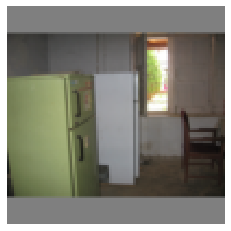

PHASE 1
	masked input


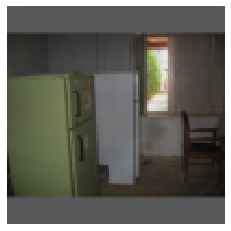

	attention mask


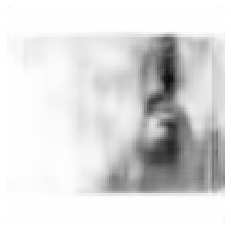

	IOR (for next phase)


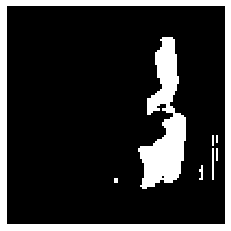

PHASE 2
	masked input


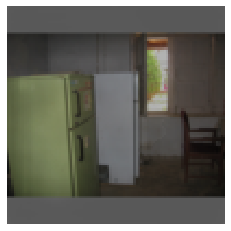

	attention mask


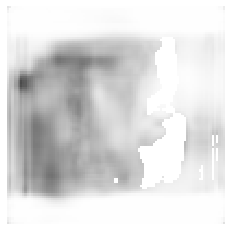

	IOR (for next phase)


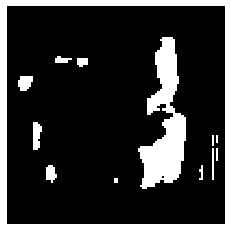

In [7]:
for i, (x, data, labels) in enumerate(test_loader):
    print("INPUT IMAGE")
    toshow(x[0].detach().cpu().numpy())
    masks, hiddens, ior, _ = runner.visualize(x, data, labels)
    
    for j, mask in enumerate(masks): 
        hidden = hiddens[j]
        ior_mask = ior[j]
        
        print("PHASE %s"%(j + 1))
        print("\tmasked input")
        toshow(mask[0])
        print("\tattention mask")
        toshow(hidden[0])
        print("\tIOR (for next phase)")
        toshow(ior_mask[0] * 1.0)
    break

# Part 2. Plot Graphs

In [ ]:
metric_files = ["model2.csv", "model3.csv", "model4.csv", "model5.csv"]

In [ ]:
df = files_to_df(metric_files)
df.groupby(["lr","penalty"])["final_acc"].mean().unstack()

In [ ]:
df = df[df["lr"] == 0.001]
plot_boxplots(df, save = False)

In [8]:
df = files_to_df(["newcoco1.csv"])
df[["final_f1", "train_f1"]]

,final_f1,train_f1
0,0.230445,0.250015


In [9]:
df.head()

,Unnamed: 0,acc,f1,final_acc,loss,smooth_acc,smooth_f1,step,val_acc,val_f1,val_step,train_acc,convert_train,convert_train_steps,train_f1,final_f1,convert_val,convert_val_steps
0,0,"[0.25, 0.03125, 0.15625, 0.0, 0.15625, 0.0625,...","[0.07240143369175628, 0.007575757575757576, 0....",0.319089,"[184.37957763671875, 12.279006958007812, 116.8...","[0.25, 0.140625, 0.14583333333333334, 0.109375...","[0.07240143369175628, 0.039988595633756924, 0....","[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, ...","[0.10989492119089317, 0.11033274956217162, 0.1...","[0.03150231808319046, 0.05322624543445518, 0.0...","[0, 417, 834, 1251, 1668, 2085, 2502, 2919, 33...",0.366278,"[0.25, 0.140625, 0.14583333333333334, 0.109375...","[0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, ...",0.250015,0.230445,"[0.10989492119089317, 0.11033274956217162, 0.1...","[0.0, 417.0, 834.0, 1251.0, 1668.0, 2085.0, 25..."
